In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
startups=pd.read_csv("C:\\Users\\lenovo\\Downloads\\50_Startups (1).csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


There are no null values in the data

In [4]:
startups[startups.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


There are no duplicate values in the data

In [5]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

# creating dummy variables for the categorical column

In [7]:
startups_new=pd.get_dummies(startups,columns=['State'])

In [8]:
startups_new.columns=['RnD_Spend','Administration','Marketing_Spend','Profit','State_California','State_Florida','State_NewYork']

<AxesSubplot:>

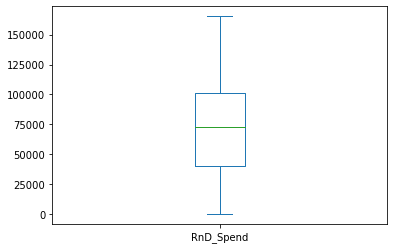

In [9]:
startups_new['RnD_Spend'].plot(kind='box')

<AxesSubplot:>

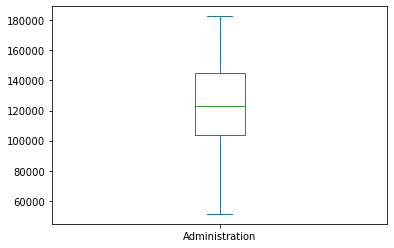

In [10]:
startups_new['Administration'].plot(kind='box')

<AxesSubplot:>

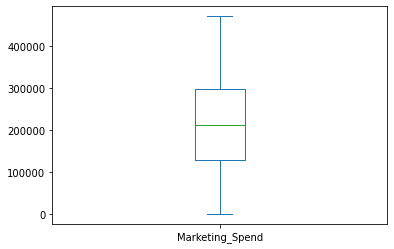

In [11]:
startups_new['Marketing_Spend'].plot(kind='box')

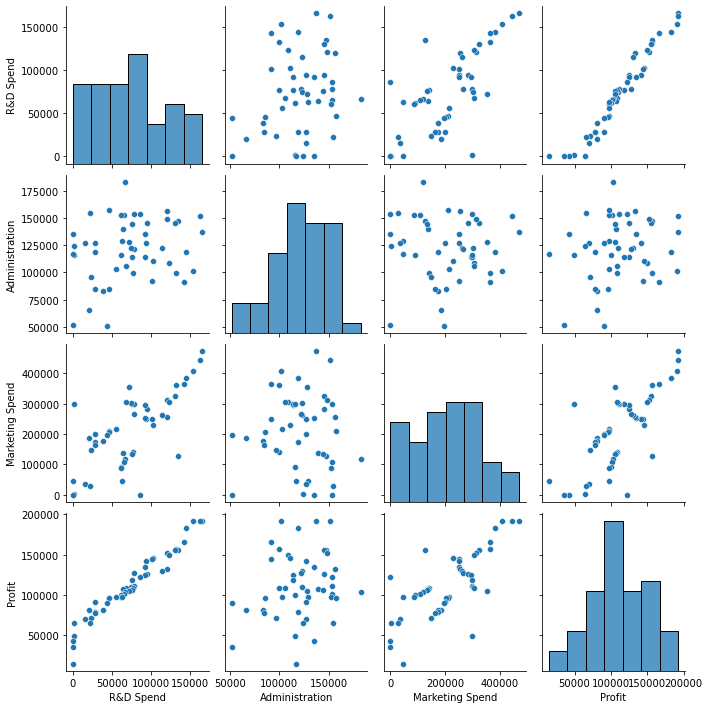

In [12]:
sns.pairplot(startups.iloc[:,:5])

In [13]:
startups_new.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
RnD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


# creating new columns which are transformations for the existing columns

In [14]:
startups_new['admin_sq']=startups_new.Administration**2
startups_new['admin_sqrt']=startups_new.Administration**0.5
startups_new['admin_log']=np.log(startups_new.Administration)
startups_new['mar_sq']=startups_new.Marketing_Spend**2
startups_new['mar_sqrt']=startups_new.Marketing_Spend**0.5
startups_new['mar_log']=np.log(startups_new.Marketing_Spend)
startups_new['rnd_sq']=startups_new.RnD_Spend**2
startups_new['rnd_sqrt']=startups_new.RnD_Spend**0.5
startups_new['rnd_log']=np.log(startups_new.RnD_Spend)                             

In [15]:
startups_new

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork,admin_sq,admin_sqrt,admin_log,mar_sq,mar_sqrt,mar_log,rnd_sq,rnd_sqrt,rnd_log
0,165349.20,136897.80,471784.10,192261.83,0,0,1,1.874101e+10,369.997027,11.826990,2.225802e+11,686.865416,13.064277,2.734036e+10,406.631529,12.015815
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.291517e+10,389.072731,11.927533,1.970459e+11,666.257105,13.003351,2.643801e+10,403.234051,11.999034
2,153441.51,101145.55,407934.54,191050.39,0,1,0,1.023042e+10,318.033882,11.524316,1.664106e+11,638.697534,12.918862,2.354430e+10,391.716109,11.941075
3,144372.41,118671.85,383199.62,182901.99,0,0,1,1.408301e+10,344.487808,11.684117,1.468419e+11,619.031195,12.856311,2.084339e+10,379.963696,11.880151
4,142107.34,91391.77,366168.42,166187.94,0,1,0,8.352456e+09,302.310718,11.422911,1.340793e+11,605.118517,12.810849,2.019450e+10,376.971272,11.864338
5,131876.90,99814.71,362861.36,156991.12,0,0,1,9.962976e+09,315.934661,11.511071,1.316684e+11,602.379747,12.801776,1.739152e+10,363.148592,11.789624
6,134615.46,147198.87,127716.82,156122.51,1,0,0,2.166751e+10,383.665049,11.899540,1.631159e+10,357.374901,11.757571,1.812132e+10,366.899796,11.810178
7,130298.13,145530.06,323876.68,155752.60,0,1,0,2.117900e+10,381.484023,11.888138,1.048961e+11,569.101643,12.688118,1.697760e+10,360.968323,11.777580
8,120542.52,148718.95,311613.29,152211.77,0,0,1,2.211733e+10,385.640960,11.909814,9.710284e+10,558.223333,12.649518,1.453050e+10,347.192339,11.699758
9,123334.88,108679.17,304981.62,149759.96,1,0,0,1.181116e+10,329.665239,11.596155,9.301379e+10,552.251410,12.628007,1.521149e+10,351.190660,11.722659


# Creating model with the untransfored columns

In [16]:
model=smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [17]:
model.fittedvalues

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292789
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725742
19    115594.188411
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364708
46     56272.992679
47     46468.232003
48     49123.073082
49     48185.038790


In [18]:
model.rsquared

0.9507524843355148

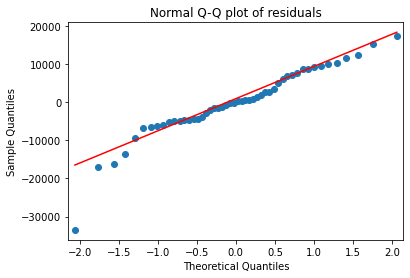

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

<AxesSubplot:>

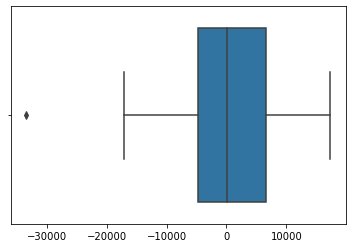

In [20]:
sns.boxplot(model.resid)

<AxesSubplot:ylabel='Density'>

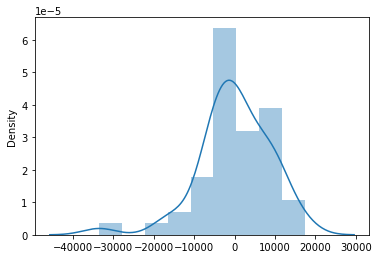

In [21]:
sns.distplot(model.resid)

# checking for homoscedacity

In [22]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

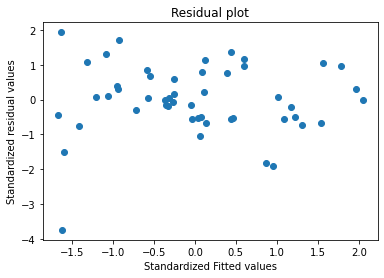

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))


plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()    

In [24]:
model.pvalues

Intercept           2.807645e-09
RnD_Spend           2.578772e-21
Administration      6.077373e-01
Marketing_Spend     1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NewYork       9.409010e-06
dtype: float64

In [25]:
rsd_admin = smf.ols('Administration~RnD_Spend+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit().rsquared
vif_admin = 1/(1-rsd_admin)

rsd_rnd = smf.ols('RnD_Spend~Administration+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit().rsquared
vif_rnd = 1/(1-rsd_rnd)

rsq_mar = smf.ols('Marketing_Spend~RnD_Spend+Administration+State_California+State_Florida+State_NewYork',data=startups_new).fit().rsquared
vif_mar = 1/(1-rsq_mar)


#Storing vif value in a data frame
d1 = {'Variables':['admin','rnd','mar'],'VIF':[vif_admin,vif_rnd,vif_mar]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,admin,1.177766
1,rnd,2.495511
2,mar,2.416797


# Administration and Marketing spend has high pvalues particularly administration which has a pvalue of 60%

# Calculating cook's distance and checking for values above the leverge citoff

In [26]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
k=6
n=50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
for i in c:
    if i>leverage_cutoff:
        print(i)
print(c)    

[6.58235386e-06 3.39430615e-03 2.39098625e-02 2.02032949e-02
 1.20198420e-02 1.00370545e-02 2.13697865e-03 3.57036535e-03
 6.25257579e-05 5.41213370e-03 1.89764313e-02 1.65867572e-02
 1.82797330e-02 6.34364572e-03 6.17285106e-02 3.72134923e-02
 1.35078103e-02 3.71193311e-03 2.94854637e-03 2.81922632e-02
 6.02783698e-04 1.00287995e-02 3.02178458e-03 3.16115938e-04
 4.34597714e-03 3.56884817e-03 4.96640589e-03 2.78597505e-02
 9.20897921e-04 9.83021753e-05 2.28936702e-05 3.65145588e-06
 5.61582965e-04 2.31043413e-04 1.79909587e-02 7.13289876e-03
 5.07832731e-02 6.16526092e-05 4.78300794e-02 1.37854568e-03
 1.94676476e-03 1.88154422e-03 1.42427115e-04 2.00561912e-02
 1.00026060e-04 8.09098154e-02 3.62771434e-02 3.84131479e-03
 1.34036686e-01 2.26250945e-01]


# All values are below the leverage cutoff

# Creting models with different with different transformed columns instead of the Administration column

In [27]:
model_admin_sq=smf.ols('Profit~RnD_Spend+admin_sq+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()
model_admin_sqrt=smf.ols('Profit~RnD_Spend+admin_sqrt+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()
model_admin_log=smf.ols('Profit~RnD_Spend+admin_log+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [28]:
print(model_admin_sq.pvalues,model_admin_sqrt.pvalues,model_admin_log.pvalues,sep='\n')

Intercept           2.517322e-14
RnD_Spend           2.460902e-21
admin_sq            5.652020e-01
Marketing_Spend     1.349188e-01
State_California    5.940661e-07
State_Florida       4.665382e-06
State_NewYork       1.212163e-06
dtype: float64
Intercept           7.161532e-05
RnD_Spend           2.528063e-21
admin_sqrt          6.441167e-01
Marketing_Spend     1.147103e-01
State_California    4.975101e-04
State_Florida       9.062034e-04
State_NewYork       4.963419e-04
dtype: float64
Intercept           2.619110e-01
RnD_Spend           2.388318e-21
admin_log           6.921231e-01
Marketing_Spend     1.062041e-01
State_California    2.656939e-01
State_Florida       2.656507e-01
State_NewYork       2.645709e-01
dtype: float64


# even with transformations applied, the pvalues is very high. Thus eliminating the Administrations column

In [29]:
model1=smf.ols('Profit~RnD_Spend+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [30]:
model_mar_sq=smf.ols('Profit~RnD_Spend+mar_sq+State_California+State_Florida+State_NewYork',data=startups_new).fit()
model_mar_sqrt=smf.ols('Profit~RnD_Spend+mar_sqrt+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [31]:
print(model_mar_sq.pvalues,model_mar_sqrt.pvalues,model1.pvalues,sep='\n')

Intercept           3.286941e-23
RnD_Spend           1.725308e-22
mar_sq              1.482270e-01
State_California    1.151792e-07
State_Florida       1.853318e-07
State_NewYork       4.591356e-07
dtype: float64
Intercept           9.373589e-16
RnD_Spend           2.420487e-24
mar_sqrt            8.237836e-02
State_California    1.917196e-06
State_Florida       2.734192e-05
State_NewYork       9.515707e-07
dtype: float64
Intercept           5.420201e-21
RnD_Spend           6.509785e-23
Marketing_Spend     7.204640e-02
State_California    2.004515e-07
State_Florida       1.970877e-06
State_NewYork       4.720949e-07
dtype: float64


# Pvalues of marketing spend is higher than 5% in all the transformation and in the untransformed data.Thus marketing spend column is eliminated

# Calculating cook's distance and checking for values above the leverage curoff

In [32]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance
k=5
n=50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
for i in c:
    if i>leverage_cutoff:
        print(i)
print(c)    
print(leverage_cutoff)

[9.36302693e-05 2.04471945e-03 2.59309540e-02 2.45448548e-02
 5.92472096e-03 7.71147801e-03 2.31137569e-03 4.61187082e-03
 2.82464255e-07 4.44612822e-03 2.08324844e-02 1.47599455e-02
 2.15371949e-02 6.27957407e-03 6.49573491e-02 4.24018186e-02
 1.54566352e-02 4.29524836e-03 3.17863986e-03 3.12219200e-02
 6.93418996e-04 9.21045140e-03 3.83896203e-03 2.93929630e-04
 2.48295864e-03 3.26945439e-03 6.31640990e-03 3.22658862e-02
 3.82922600e-07 3.39123158e-04 1.40869788e-04 1.19675217e-04
 5.48795206e-04 1.29348856e-04 6.89992838e-03 7.93657634e-03
 4.97609857e-02 6.41180255e-04 4.31680145e-02 5.51338381e-04
 1.92148634e-03 2.68835363e-03 3.08552920e-04 2.18841144e-02
 1.58350809e-05 9.20442792e-02 4.56219781e-02 5.17009789e-03
 4.33768102e-02 2.68318650e-01]
0.36


# All values are below the leverge cutoff

# improving the model

# Builiding model with different transformations of the RnD spending column

In [33]:
model2=smf.ols('Profit~RnD_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [34]:
model2.rsquared

0.9467168588373374

In [35]:
model2.pvalues

Intercept           3.145656e-23
RnD_Spend           1.078480e-30
State_California    2.205806e-07
State_Florida       1.714253e-07
State_NewYork       4.913660e-07
dtype: float64

In [36]:
print(model2.mse_resid)

92208584.51691337


In [37]:
model_rnd_sq=smf.ols('Profit~rnd_sq+State_California+State_Florida+State_NewYork',data=startups_new).fit()
model_rnd_sqrt=smf.ols('Profit~rnd_sqrt+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [38]:
print(model_rnd_sq.pvalues,model_rnd_sqrt.pvalues,model2.pvalues,sep='\n')

Intercept           3.892688e-27
rnd_sq              1.031165e-20
State_California    3.520692e-06
State_Florida       4.712795e-08
State_NewYork       3.135185e-06
dtype: float64
Intercept           5.086587e-05
rnd_sqrt            6.151635e-25
State_California    7.367285e-02
State_Florida       1.098025e-01
State_NewYork       3.520079e-02
dtype: float64
Intercept           3.145656e-23
RnD_Spend           1.078480e-30
State_California    2.205806e-07
State_Florida       1.714253e-07
State_NewYork       4.913660e-07
dtype: float64


# square root transformation has high pvalues

In [39]:
print(model_rnd_sq.rsquared,model_rnd_sqrt.rsquared,model2.rsquared,sep='\n')

0.8555928118987466
0.9052794732819768
0.9467168588373374


# untransformed data has the highest requared value

In [40]:
print(model_rnd_sq.mse_resid,model_rnd_sqrt.mse_resid,model2.mse_resid,sep='\n')

249902354.07170278
163917620.14747083
92208584.51691337


# untransformed data has the lowest error

# Calculating cook's distance and checking for values above the leverage cutoff

In [41]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance
k=4
n=50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
startups_new['c']=c
startups_new=startups_new[startups_new.c<leverage_cutoff] 
startups_new

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork,admin_sq,admin_sqrt,admin_log,mar_sq,mar_sqrt,mar_log,rnd_sq,rnd_sqrt,rnd_log,c
0,165349.20,136897.80,471784.10,192261.83,0,0,1,1.874101e+10,369.997027,11.826990,2.225802e+11,686.865416,13.064277,2.734036e+10,406.631529,12.015815,0.002417
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.291517e+10,389.072731,11.927533,1.970459e+11,666.257105,13.003351,2.643801e+10,403.234051,11.999034,0.008784
2,153441.51,101145.55,407934.54,191050.39,0,1,0,1.023042e+10,318.033882,11.524316,1.664106e+11,638.697534,12.918862,2.354430e+10,391.716109,11.941075,0.033392
3,144372.41,118671.85,383199.62,182901.99,0,0,1,1.408301e+10,344.487808,11.684117,1.468419e+11,619.031195,12.856311,2.084339e+10,379.963696,11.880151,0.034276
4,142107.34,91391.77,366168.42,166187.94,0,1,0,8.352456e+09,302.310718,11.422911,1.340793e+11,605.118517,12.810849,2.019450e+10,376.971272,11.864338,0.006540
5,131876.90,99814.71,362861.36,156991.12,0,0,1,9.962976e+09,315.934661,11.511071,1.316684e+11,602.379747,12.801776,1.739152e+10,363.148592,11.789624,0.004258
6,134615.46,147198.87,127716.82,156122.51,1,0,0,2.166751e+10,383.665049,11.899540,1.631159e+10,357.374901,11.757571,1.812132e+10,366.899796,11.810178,0.016246
7,130298.13,145530.06,323876.68,155752.60,0,1,0,2.117900e+10,381.484023,11.888138,1.048961e+11,569.101643,12.688118,1.697760e+10,360.968323,11.777580,0.006368
8,120542.52,148718.95,311613.29,152211.77,0,0,1,2.211733e+10,385.640960,11.909814,9.710284e+10,558.223333,12.649518,1.453050e+10,347.192339,11.699758,0.000078
9,123334.88,108679.17,304981.62,149759.96,1,0,0,1.181116e+10,329.665239,11.596155,9.301379e+10,552.251410,12.628007,1.521149e+10,351.190660,11.722659,0.004318


# Removed data that was above the leverage cutoff

In [42]:
model3=smf.ols('Profit~RnD_Spend+State_California+State_Florida+State_NewYork',data=startups_new).fit()

In [43]:
print(model3.rsquared,model2.rsquared)

0.957797215080174 0.9467168588373374


In [44]:
print(np.sqrt(model3.mse_resid),np.sqrt(model2.mse_resid))

8098.8109956309945 9602.530110179992


In [45]:
print(model3.pvalues,model2.pvalues,sep='\n')

Intercept           2.820149e-26
RnD_Spend           1.775643e-32
State_California    2.558546e-10
State_Florida       3.357377e-09
State_NewYork       1.426591e-08
dtype: float64
Intercept           3.145656e-23
RnD_Spend           1.078480e-30
State_California    2.205806e-07
State_Florida       1.714253e-07
State_NewYork       4.913660e-07
dtype: float64


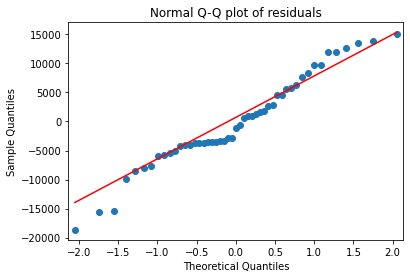

In [46]:
qqplot=sm.qqplot(model3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

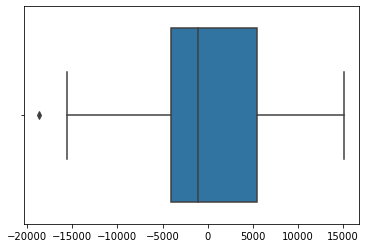

In [47]:
sns.boxplot(model3.resid)

<AxesSubplot:ylabel='Density'>

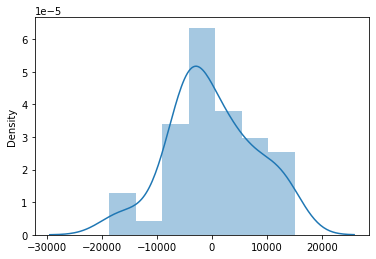

In [48]:
sns.distplot(model3.resid)

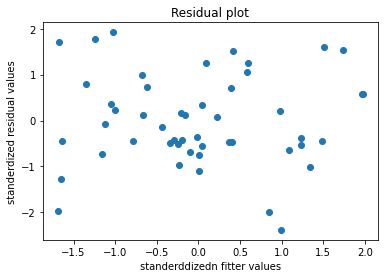

In [49]:
plt.scatter(get_standardized_values(model3.fittedvalues),get_standardized_values(model3.resid))


plt.title('Residual plot')
plt.ylabel('standerdized residual values')
plt.xlabel('standerddizedn fitter values')
plt.show()

# Model3 has the least mse error with a good rsquare values and acceptable pvalues. so model3 is taken as the finalised model

In [54]:
model_final=model3

In [63]:
created_models=pd.Series(['model','model_admin_sq','model_admin_sqrt','model_admin_log','model1','model_mar_sq','model_mar_sqrt','model2','model_rnd_sqrt','model3(final model)'])
rsquared=pd.Series([model.rsquared,model_admin_sq.rsquared,model_admin_sqrt.rsquared,model_admin_log.rsquared,model1.rsquared,model_mar_sq.rsquared,model_mar_sqrt.rsquared,model2.rsquared,model_rnd_sq.rsquared,model_rnd_sq.rsquared,model_final.rsquared])
rsquared_df=pd.DataFrame()
rsquared_df['models']=created_models
rsquared_df['rsquared']=rsquared

# Table of rsquared values of all models

In [64]:
rsquared_df

,models,rsquared
0,model,0.950752
1,model_admin_sq,0.950829
2,model_admin_sqrt,0.950696
3,model_admin_log,0.950632
4,model1,0.950453
5,model_mar_sq,0.949162
6,model_mar_sqrt,0.950210
7,model2,0.946717
8,model_rnd_sqrt,0.855593
9,model3(final model),0.855593


# predicting for new values

In [69]:
new=pd.DataFrame(columns=['RnD_Spend','Administration','Marketing_Spend','State_California','State_Florida','State_NewYork'])
new.loc[0]=[150000,100000,300000,0,1,0]
new.loc[1]=[180000,50000,500000,0,0,1]
new

,RnD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_NewYork
0,150000,100000,300000,0,1,0
1,180000,50000,500000,0,0,1


In [70]:
model_final.predict(new)

0    176188.203757
1    199787.347632
dtype: float64